<a href="https://colab.research.google.com/github/monsur28/Social-Media-Sentiment-Analysis/blob/main/Social_Media_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('/content/Social Media Sentiment Analysis.csv')

# Display the first few rows and a statistical summary for numerical columns
print(data.info())
print(data.head())
print(data.describe())

# Check for class distribution in the 'Sentiment Label' column to identify any imbalance
class_distribution = data['Sentiment Label'].value_counts(normalize=True)
print("Class distribution in 'Sentiment Label':\n", class_distribution)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Post ID              2000 non-null   object
 1   Post Content         2000 non-null   object
 2   Sentiment Label      2000 non-null   object
 3   Number of Likes      2000 non-null   int64 
 4   Number of Shares     2000 non-null   int64 
 5   Number of Comments   2000 non-null   int64 
 6   User Follower Count  2000 non-null   int64 
 7   Post Date and Time   2000 non-null   object
 8   Post Type            2000 non-null   object
 9   Language             2000 non-null   object
dtypes: int64(4), object(6)
memory usage: 156.4+ KB
None
                                Post ID  \
0  aa391375-7355-44b7-bcbf-97fb4e5a2ba3   
1  1c9ec98d-437a-48d9-9cba-bd5ad853c59a   
2  170e5b5b-1d9a-4d02-a957-93c4dbb18908   
3  aec53496-60ee-4a06-8821-093a04dc8770   
4  4eacddb7-990d-4056-8784-7e1d5c

<ipython-input-5-7795af880c1b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


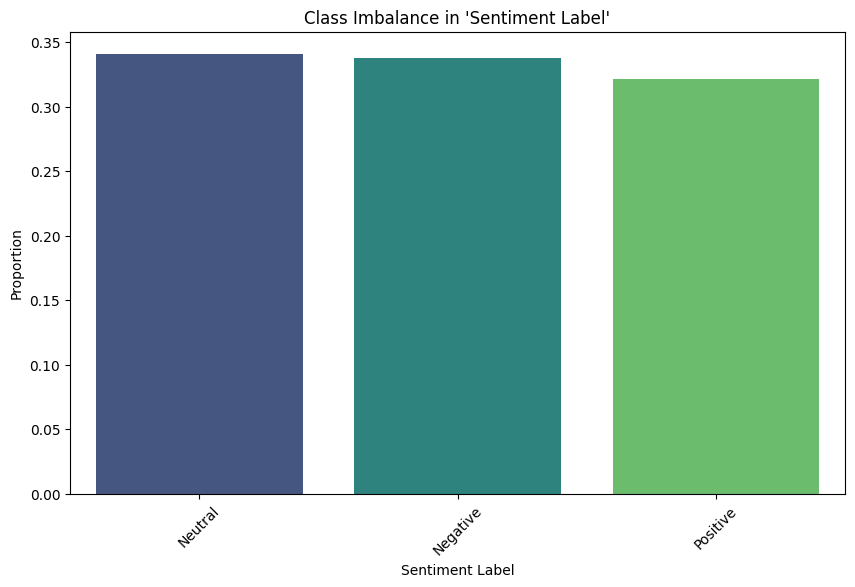

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate class distribution
class_distribution = data['Sentiment Label'].value_counts(normalize=True)

# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.title("Class Imbalance in 'Sentiment Label'")
plt.xlabel("Sentiment Label")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.show()

In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from collections import Counter

# Step 1: Drop unnecessary columns and remove rows with missing values in relevant columns
data_cleaned = data.drop(columns=['Post ID', 'Post Date and Time']).dropna(subset=['Post Content', 'Sentiment Label'])

# Step 2: Encode the 'Post Content' text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data_cleaned['Post Content'])

# Step 3: Encode the target variable 'Sentiment Label' using Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data_cleaned['Sentiment Label'])

# Step 4: Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 5: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Display the new class distribution
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution after SMOTE: Counter({1: 682, 2: 682, 0: 682})


<ipython-input-7-935ed52f050d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment Label', y='Count', data=class_distribution_df, palette="viridis")


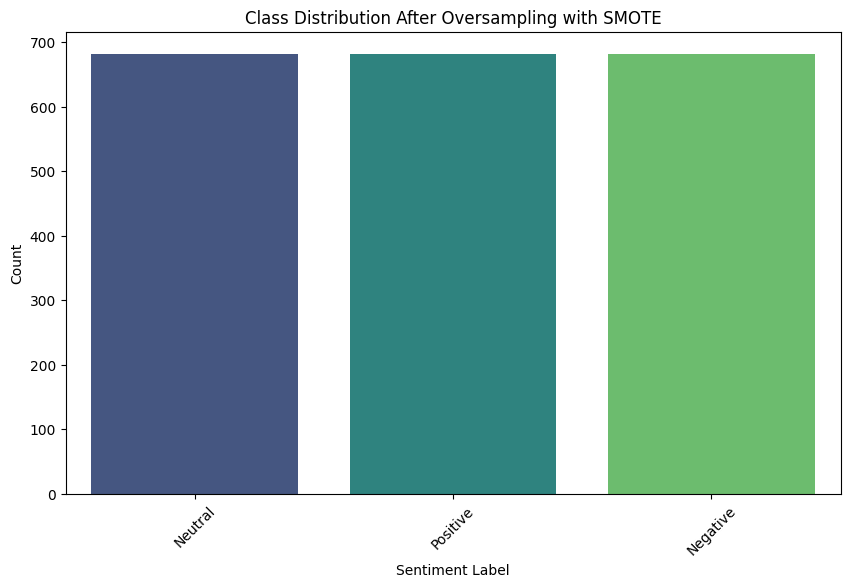

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

# Count the new class distribution after SMOTE
class_distribution_resampled = Counter(y_resampled)

# Convert to a DataFrame for easier plotting
class_distribution_df = pd.DataFrame.from_dict(class_distribution_resampled, orient='index').reset_index()
class_distribution_df.columns = ['Sentiment Label', 'Count']
class_distribution_df['Sentiment Label'] = label_encoder.inverse_transform(class_distribution_df['Sentiment Label'])

# Plot the resampled class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment Label', y='Count', data=class_distribution_df, palette="viridis")
plt.title("Class Distribution After Oversampling with SMOTE")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.3575

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.45      0.38       121
           1       0.41      0.36      0.38       149
           2       0.33      0.27      0.30       130

    accuracy                           0.36       400
   macro avg       0.36      0.36      0.35       400
weighted avg       0.36      0.36      0.35       400


Confusion Matrix:
 [[54 33 34]
 [59 54 36]
 [49 46 35]]


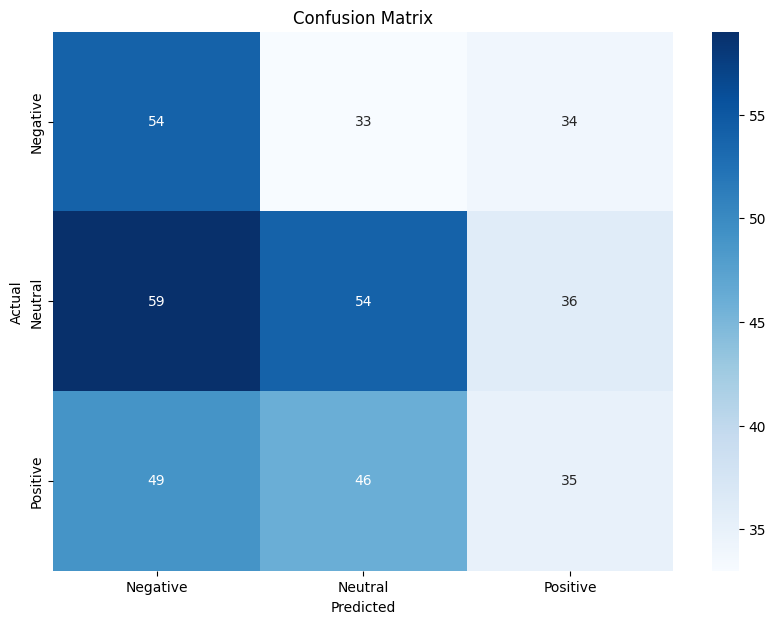

Classification Report:
               precision    recall  f1-score   support

    Negative       0.33      0.45      0.38       121
     Neutral       0.41      0.36      0.38       149
    Positive       0.33      0.27      0.30       130

    accuracy                           0.36       400
   macro avg       0.36      0.36      0.35       400
weighted avg       0.36      0.36      0.35       400



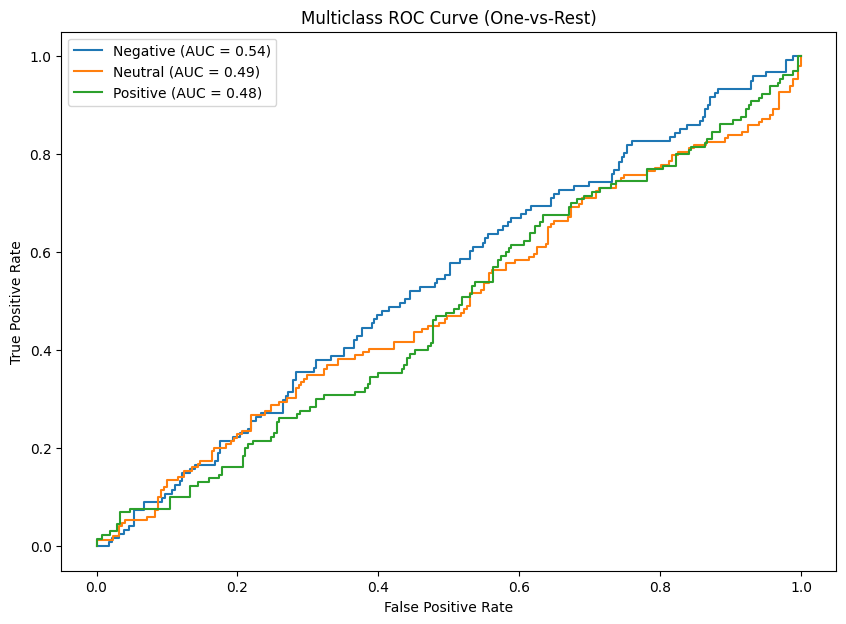

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions and get predicted probabilities
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# ROC Curve for one-vs-rest (multiclass)
plt.figure(figsize=(10, 7))
for i in range(len(label_encoder.classes_)):
    # Calculate FPR and TPR for each class
    fpr, tpr, _ = roc_curve(y_test == i, y_proba[:, i])
    # Plot the ROC curve with AUC score
    plt.plot(fpr, tpr, label=f"{label_encoder.classes_[i]} (AUC = {roc_auc_score(y_test == i, y_proba[:, i]):.2f})")

# Plot formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Multiclass ROC Curve (One-vs-Rest)")
plt.legend(loc="best")
plt.show()

In [17]:
def test_custom_statement():
    try:
        user_input = input("Enter a Social Media statement: ")
        # Transform the input using the trained TF-IDF vectorizer
        user_input_transformed = tfidf_vectorizer.transform([user_input])

        # Predict using the trained model
        prediction = model.predict(user_input_transformed)
        predicted_status = label_encoder.inverse_transform(prediction)

        # Display the prediction
        print("Predicted Sentiment Label:", predicted_status[0])
    except Exception as e:
        print("Error:", e)

# Call the function to test it
test_custom_statement()


Enter a Social Media statement: I want to shine is social media with my content and but my content didn't shine on social media, trying to do better and getting cringe outputs from the audience
Predicted Sentiment Label: Negative
